1-Exploration des données

télécharger les données audio
explorer les données audio
visualisation - > quels éléments permettent de distinguer les émotions des différentes expressions?

2 - machine learning

transformer les fichiers audio en fichier csv
appliquer le modèle







Filename identifiers 

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


https://zenodo.org/record/1188976#.YY1Ksk6ZM2w


https://iq.opengenus.org/introduction-to-librosa/

Reste à faire : sélectionner les fichiers audio que je veux montrer dans mon fichier et les appeler manuellement - éventuellement poser la question de savoir comment faire pour implémenter une boucle

questions pour mardi :  
Si je veux écouter l'audio en premier, comment je peux faire?

In [1]:
import librosa as lr
import librosa.display
import os
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

from glob import glob

from IPython.display import Audio


warnings.simplefilter("ignore")

In [4]:
audio_df = pd.read_csv('audio_df.csv')

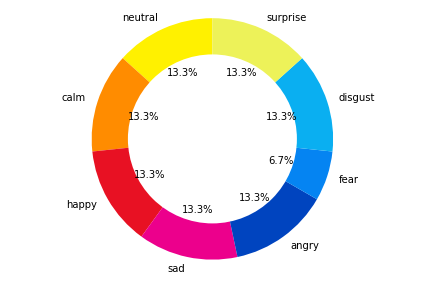

In [16]:
#Let's have a look to the distribution of emotions

emotions = ['neutral','calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

y = audio_df['emotion']
values = np.unique(y,return_counts=True)[1]

labels = emotions
sizes = values

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#0044bf','#0584f2','#0aaff1','#edf259','#ec008c']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=emotion, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

<AxesSubplot:>

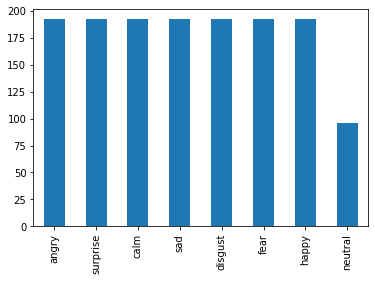

In [8]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [18]:
audio ="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav" # change with the name of your audio
y, sr = lr.load(audio) 

In [40]:
IPython.display.Audio(audio)

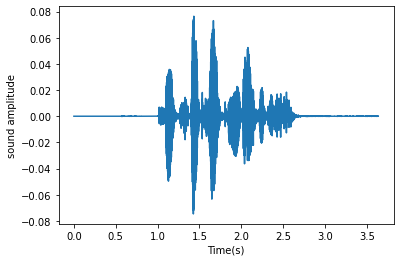

In [19]:
#timeline of the audio
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

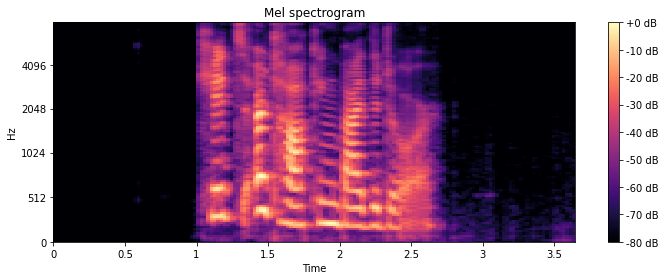

In [21]:
#Mel-Scaled Spectogram


lr.feature.melspectrogram(y=y, sr=sr)

D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Chromagram')]

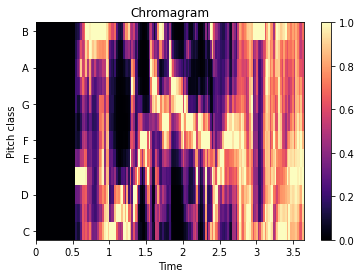

In [30]:
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

[Text(0.5, 1.0, 'MFCC')]

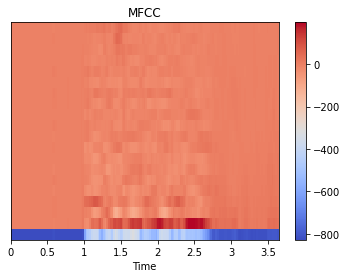

In [29]:
mfccs= librosa.feature.mfcc(y=y, sr=sr)


fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

définir les features

In [47]:
def vizualisation(audio):
    y, sr = lr.load(audio)
    
    #signal of the audio
    
    time = np.arange(0,len(y))/sr
    
    fig, ax = plt.subplots()
    ax.plot(time,y)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show() 
    
    #Mel-Scaled Spectogram

    lr.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(lr.stft(y))**2
    S = lr.feature.melspectrogram(S=D)
    S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(10, 4))
    lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()
    
    #MFCCS
    
    mfccs= librosa.feature.mfcc(y=y, sr=sr)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    plt.show()
    
    # Chroma
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='Chromagram')
    plt.show()
    
    return IPython.display.Audio(audio)
    

In [60]:
Female_Calm = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav"

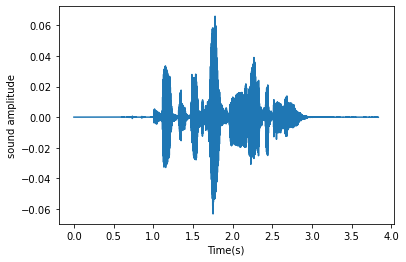

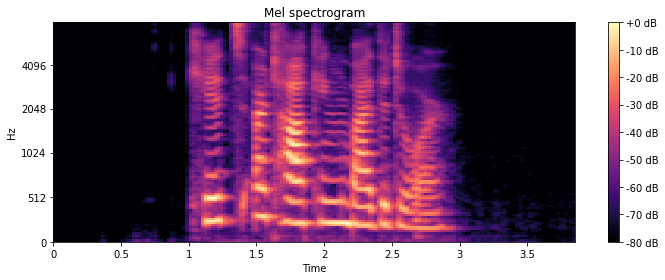

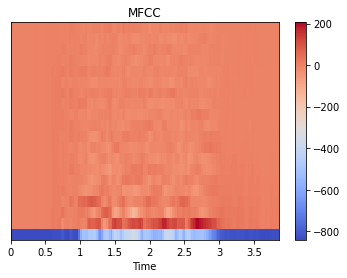

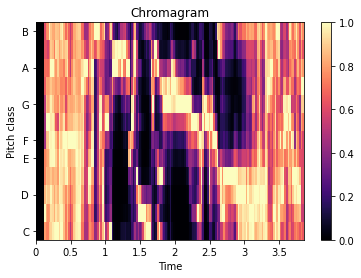

In [62]:
vizualisation(Female_Calm)

In [63]:
#surprise 08 Female
Female_Surprise = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav"

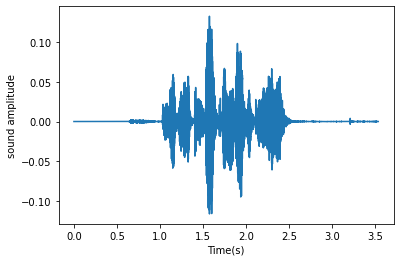

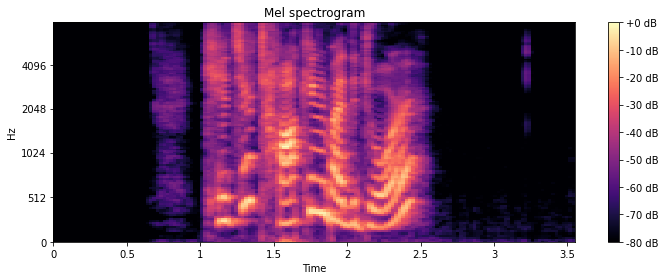

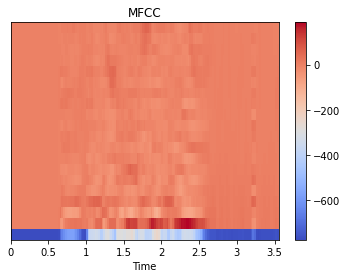

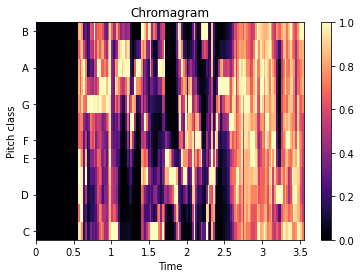

In [64]:
vizualisation(Female_Surprise)

In [65]:
#surprise 08 M
Male_Surprise = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav"

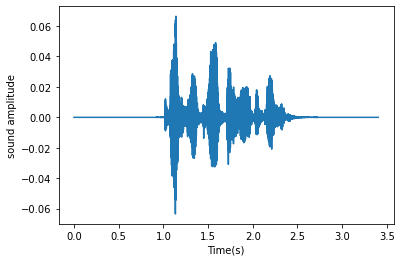

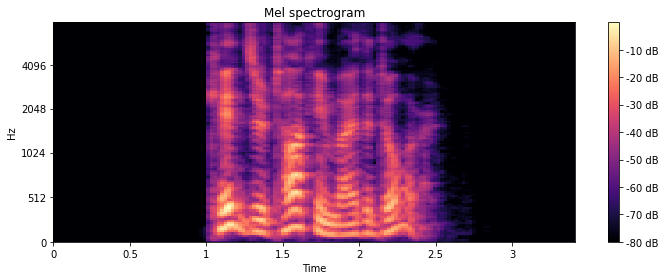

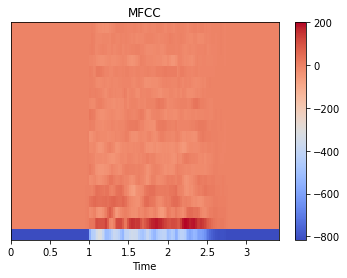

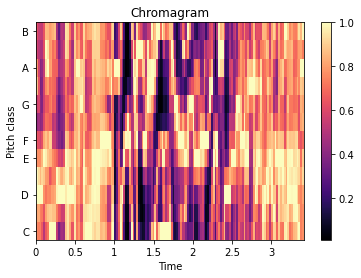

In [66]:
# surprise 08 M

vizualisation(Male_Surprise)

In [53]:
#surprise 08 M
audio4 = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_03/03-01-08-01-01-01-03.wav"

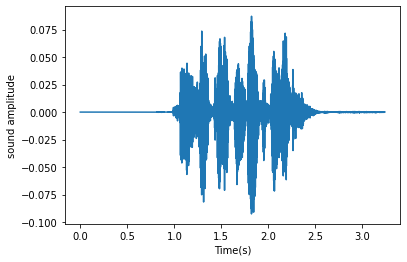

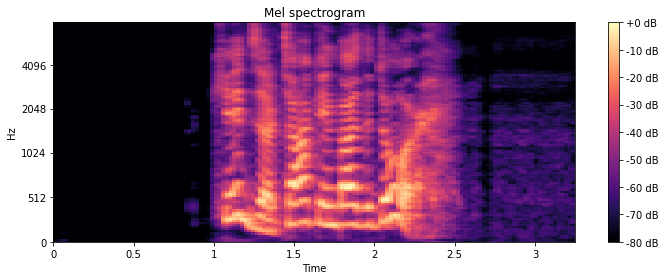

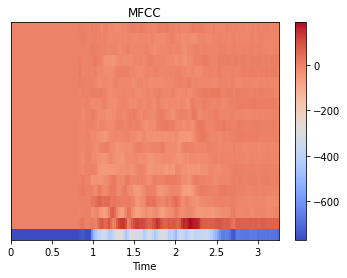

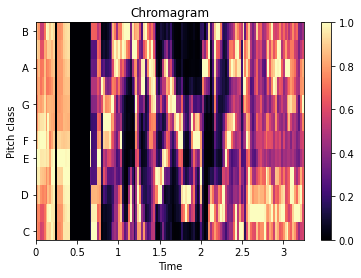

In [54]:
vizualisation(audio4)

In [55]:
audio5="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_05/03-01-08-01-01-01-05.wav"

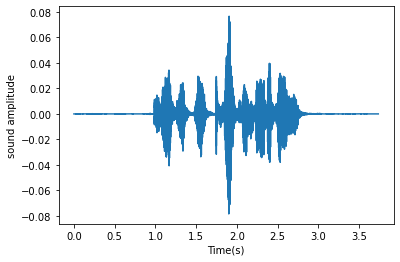

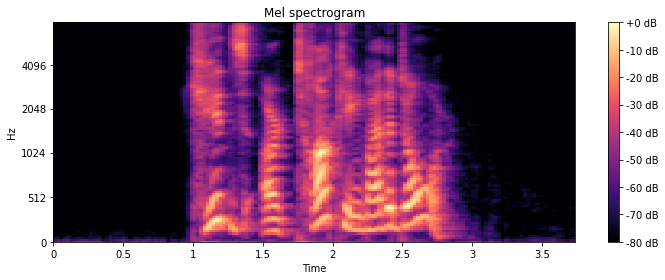

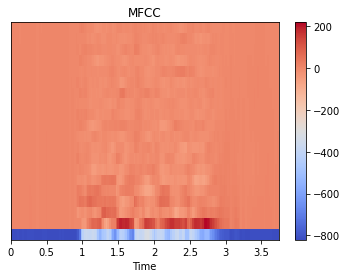

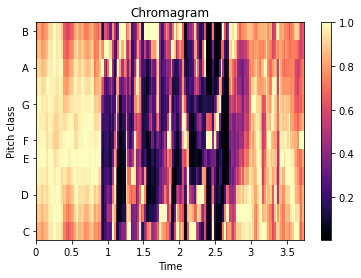

In [56]:
vizualisation(audio5)

In [57]:
audio6="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_07/03-01-08-01-01-01-07.wav"

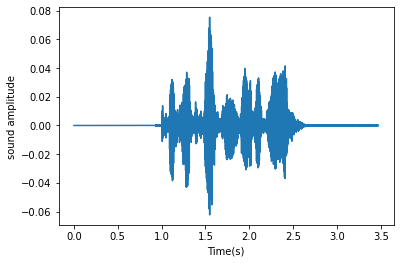

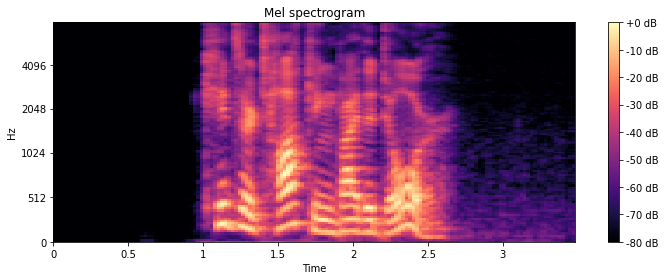

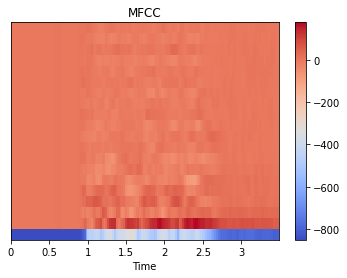

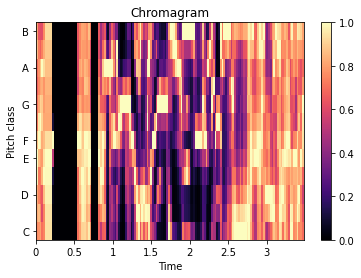

In [58]:
vizualisation(audio6)